Date: 09.04.2023

Author: Reto Hendry

This notebook is to test the reversal of the flattened np array. It should also mark the most relevant feature. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# create a 4d array which represents (sample, x, y, z)
# the shape should be (2, 6, 4, 2) so it is basically two samples with a volume of 6x4x2
# the values should increase by 1 starting from 0
sample_array_4d = np.arange(0, 48, 1, dtype=int).reshape(2, 6, 4, 2)

# do a 3d plot of the first sample, the color should be the value of the element in the array


Original array and reshaped array are equal: True


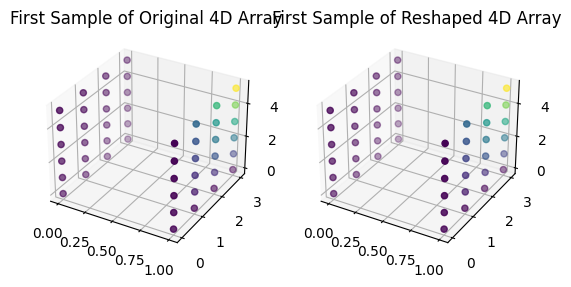

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Flatten the 4D array into a 2D array
def flatten_array(array):
    return array.reshape(array.shape[0], -1)

# Reshape the 2D array back to the original 4D shape
def reshape_to_original(array_2d, original_shape):
    return array_2d.reshape(original_shape)

# Create a 4D array (2 samples, each of shape 6x4x2)
array = np.array([[[[i * j * k for i in range(6)] for j in range(4)] for k in range(2)] for _ in range(2)])

# Flatten the 4D array into a 2D array
original_shape = array.shape
array_2d = flatten_array(array)

# Reshape the 2D array back to the original 4D shape
array_reversed = reshape_to_original(array_2d, original_shape)

# Check if the original array and the reshaped array are equal
print("Original array and reshaped array are equal:", np.array_equal(array, array_reversed))

# Plot the first sample of the original 4D array
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
x, y, z = np.meshgrid(np.arange(array.shape[1]), np.arange(array.shape[2]), np.arange(array.shape[3]), indexing='ij')
ax.scatter(x, y, z, c=array[0].flatten(), marker='o', cmap='viridis')
ax.set_title("First Sample of Original 4D Array")

# Plot the first sample of the reshaped 4D array
ax2 = fig.add_subplot(122, projection='3d')
x2, y2, z2 = np.meshgrid(np.arange(array_reversed.shape[1]), np.arange(array_reversed.shape[2]), np.arange(array_reversed.shape[3]), indexing='ij')
ax2.scatter(x2, y2, z2, c=array_reversed[0].flatten(), marker='o', cmap='viridis')
ax2.set_title("First Sample of Reshaped 4D Array")

plt.show()


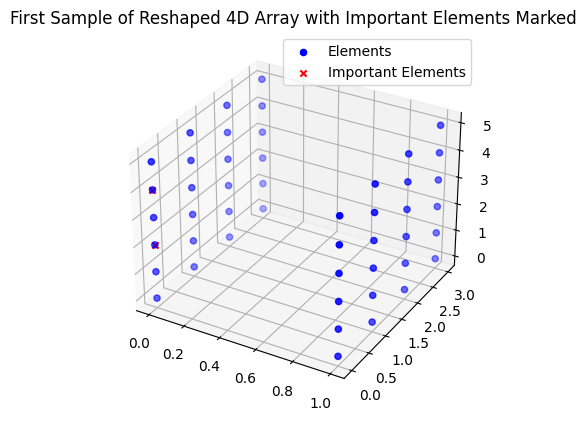

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Flatten the 4D array into a 2D array
def flatten_array(array):
    return array.reshape(array.shape[0], -1)

# Reshape the 2D array back to the original 4D shape
def reshape_to_original(array_2d, original_shape):
    return array_2d.reshape(original_shape)

# Create a 4D array (2 samples, each of shape 6x4x2)
array = np.array([[[[i * j * k for i in range(6)] for j in range(4)] for k in range(2)] for _ in range(2)])

# Flatten the 4D array into a 2D array
original_shape = array.shape
array_2d = flatten_array(array)

# Reshape the 2D array back to the original 4D shape
array_reversed = reshape_to_original(array_2d, original_shape)

# Find the indices of the important elements (3rd and 5th) in the flattened array
important_indices_flattened = [2, 4]
important_indices_4d = [np.unravel_index(index, array_reversed[0].shape) for index in important_indices_flattened]

# Plot the first sample of the reshaped 4D array, marking the important elements with an 'X'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.meshgrid(np.arange(array_reversed.shape[1]), np.arange(array_reversed.shape[2]), np.arange(array_reversed.shape[3]), indexing='ij')

# Plot all elements in blue
ax.scatter(x, y, z, c='b', marker='o', label='Elements')

# Plot important elements in red
for index in important_indices_4d:
    ax.scatter(index[0], index[1], index[2], c='r', marker='x', label='Important Elements')

# Remove duplicate labels
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc='best')

ax.set_title("First Sample of Reshaped 4D Array with Important Elements Marked")

plt.show()
